In [29]:
import numpy as np
import pandas as pd


In [30]:
master_diabetic = pd.read_csv(r"D:\PG-DAI\MachineLearning\Dec 20 Decision Trees\diabetes.csv")

In [31]:
master_diabetic.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
master_diabetic.drop(master_diabetic[master_diabetic['BloodPressure'] ==0].index, inplace = True)
master_diabetic['SkinThickness'].replace(to_replace=0, value=24.0, inplace=True, limit=None, regex=False, method='pad')


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master_diabetic.loc[:,master_diabetic.columns != 'Outcome'], master_diabetic['Outcome'], stratify=master_diabetic['Outcome'], random_state=42)

In [34]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
448,0,104,64,37,64,33.6,0.510,22
202,0,108,68,20,0,27.3,0.787,32
371,0,118,64,23,89,0.0,1.731,21
151,4,114,65,24,0,21.9,0.432,37
177,0,129,110,46,130,67.1,0.319,26
...,...,...,...,...,...,...,...,...
711,5,126,78,27,22,29.6,0.439,40
322,0,124,70,20,0,27.4,0.254,36
637,2,94,76,18,66,31.6,0.649,23
633,1,128,82,17,183,27.5,0.115,22


In [35]:
y_train.value_counts()


0    360
1    189
Name: Outcome, dtype: int64

In [36]:
y_test.value_counts()


0    121
1     63
Name: Outcome, dtype: int64

In [37]:

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)


In [38]:
# y_test.values.reshape(-1, 1)

In [39]:
y_pred = clf.predict(X_test)

In [40]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6684782608695652


[Text(2130.28125, 1585.5, 'X[1] <= 144.5\ngini = 0.451\nsamples = 549\nvalue = [360, 189]'),
 Text(1086.9375, 1494.9, 'X[7] <= 28.5\ngini = 0.348\nsamples = 423\nvalue = [328, 95]'),
 Text(560.90625, 1404.3, 'X[5] <= 45.4\ngini = 0.196\nsamples = 227\nvalue = [202, 25]'),
 Text(514.40625, 1313.7, 'X[5] <= 30.45\ngini = 0.171\nsamples = 223\nvalue = [202, 21]'),
 Text(139.5, 1223.1, 'X[0] <= 2.5\ngini = 0.053\nsamples = 111\nvalue = [108, 3]'),
 Text(93.0, 1132.5, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(186.0, 1132.5, 'X[1] <= 121.5\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(93.0, 1041.9, 'X[6] <= 0.652\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(46.5, 951.3, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(139.5, 951.3, 'X[6] <= 0.704\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(93.0, 860.7, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(186.0, 860.7, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(279.0, 1041.9, 'X[6] <= 0.267\ngini = 0.5\

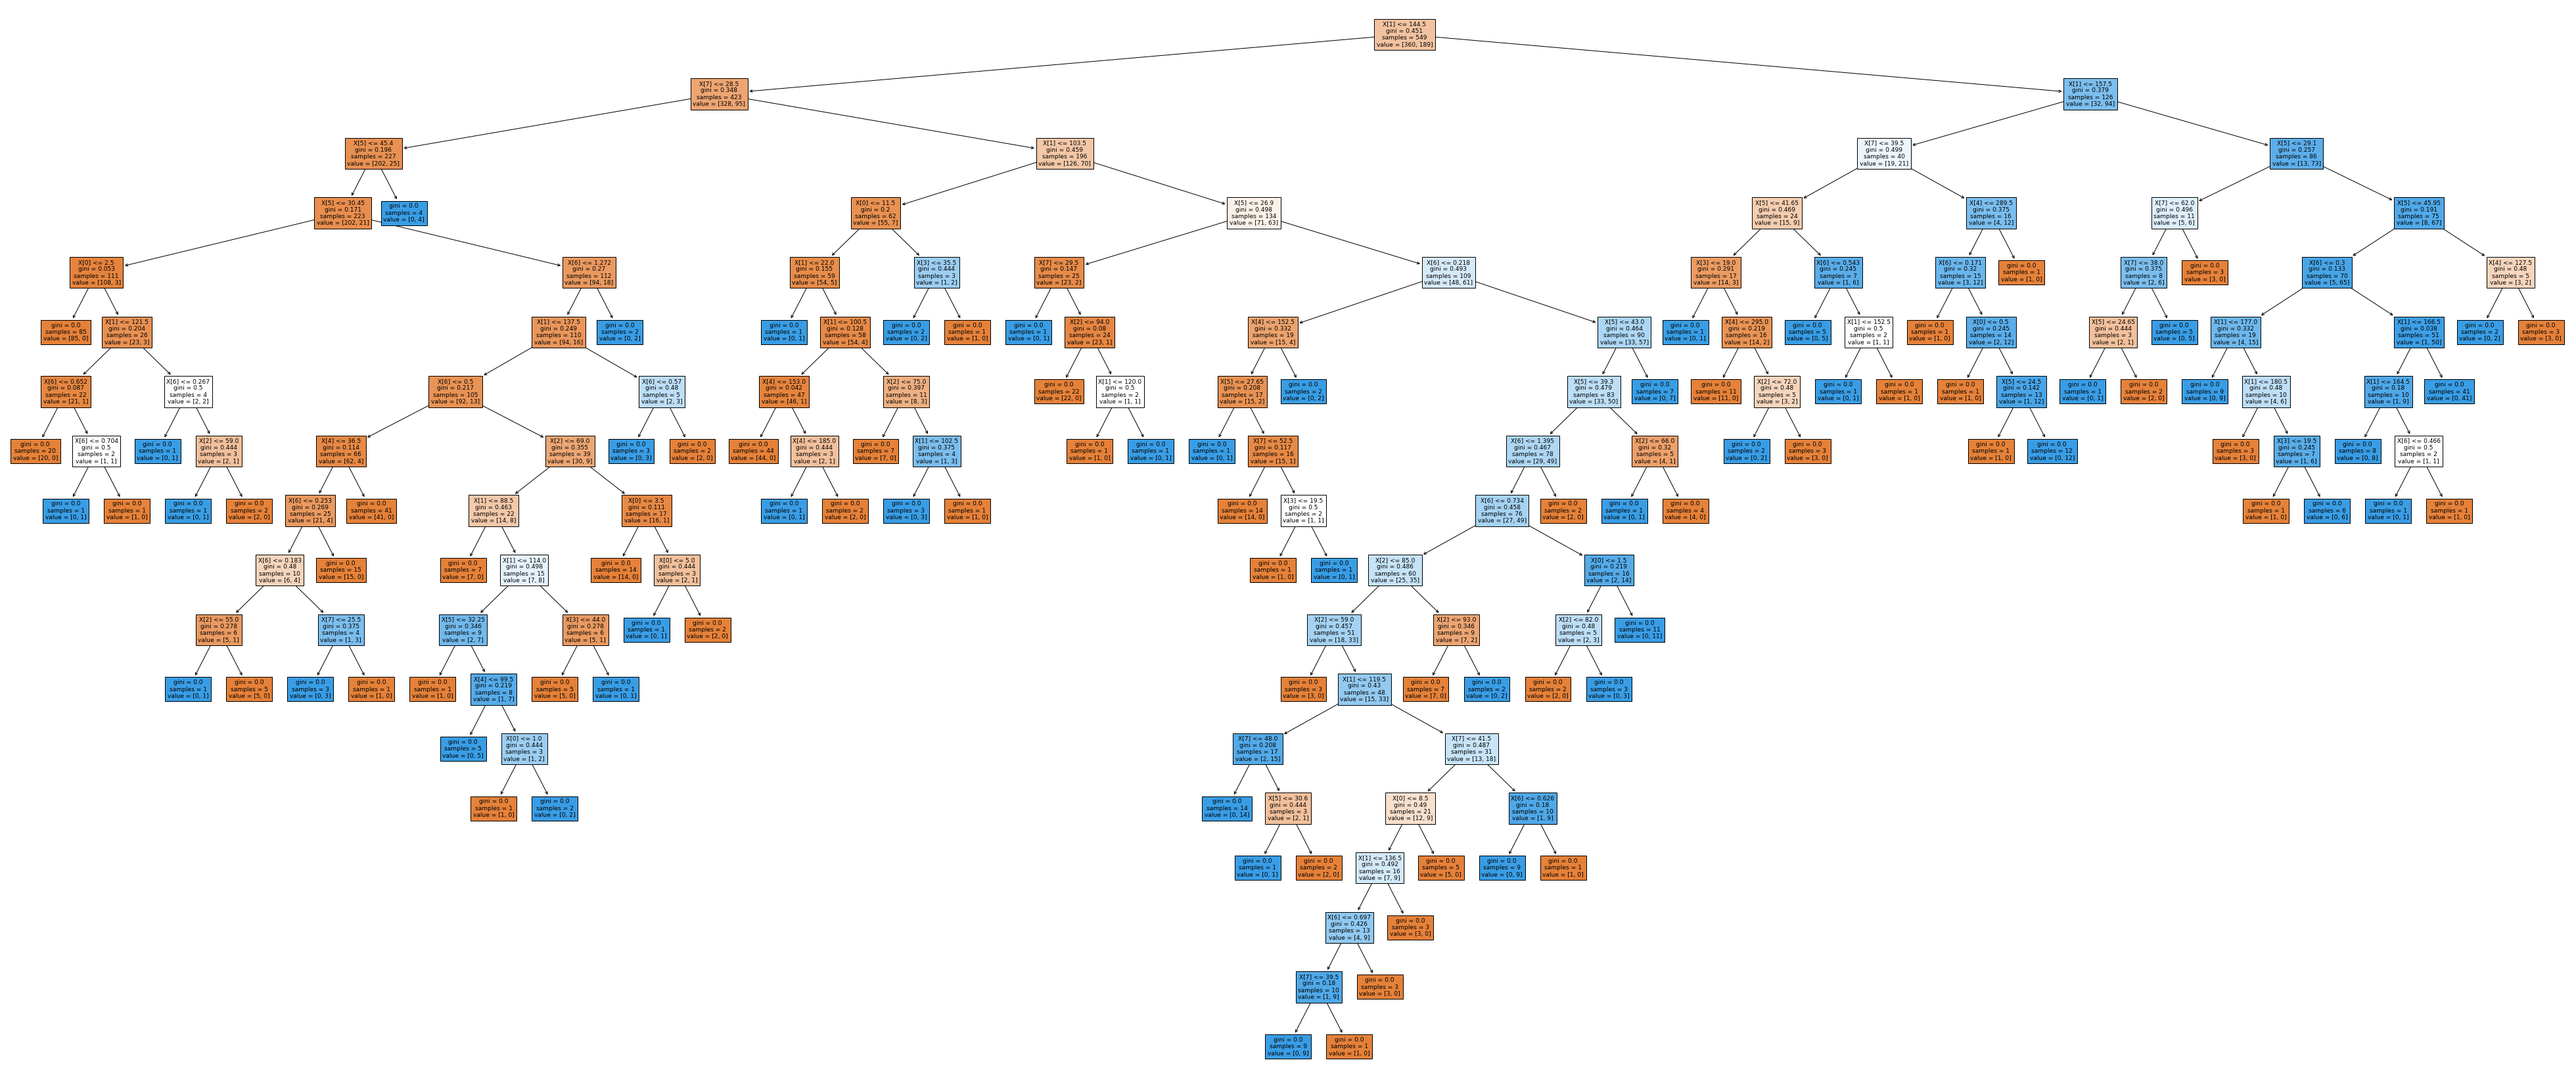

In [41]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(70,30))
tree.plot_tree(clf,filled=True)